In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df = pd.read_csv("glassdoor_datascience_salaries_cleaned.csv")

In [46]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,job_state,job_city,same_state_as_hq,company_age,python_yn,spark_yn,cloud_yn,deployments_yn,viz_tools_yn,api_dev_yn
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,NM,Albuquerque,False,51,True,False,False,False,True,False
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,MD,Linthicum,False,40,True,False,False,False,False,False
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,FL,Clearwater,True,14,True,True,False,False,False,False
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,WA,Richland,True,59,True,False,False,False,False,False
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,NY,New York,True,26,True,False,False,False,False,False


In [47]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'job_city', 'same_state_as_hq',
       'company_age', 'python_yn', 'spark_yn', 'cloud_yn', 'deployments_yn',
       'viz_tools_yn', 'api_dev_yn'],
      dtype='object')

In [48]:
print(df['Job Title'].value_counts())

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64


In [49]:
# Job title and seniority

def job_title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'Gen AI' in title.lower():
        return 'AI engineer'
    else:
        return 'na'
    

def seniority (title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'

    


In [50]:
df['job_title_simplified'] = df['Job Title'].apply(job_title_simplifier)
df['seniority'] = df['Job Title'].apply(seniority)

In [51]:
df.job_state.value_counts()



 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [52]:
    
# Fix state Los Angeles
    
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [53]:
# Job Description Length
df['jd_length'] = df['Job Description'].apply(lambda x: len(x))

In [54]:
# Competitors Count

df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [55]:
# Hourly wage to annual wage

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly else x.max_salary, axis = 1)
df['avg_salary'] = df.apply(lambda x: x.avg_salary*2 if x.hourly else x.avg_salary, axis = 1)

In [56]:
df.company_text

0                          Tecolote Research\r\n
1      University of Maryland Medical System\r\n
2                                    KnowBe4\r\n
3                                       PNNL\r\n
4                         Affinity Solutions\r\n
                         ...                    
737                                      GSK\r\n
738                               Eventbrite\r\n
739           Software Engineering Institute\r\n
740                             Numeric, LLC\r\n
741             Riverside Research Institute\r\n
Name: company_text, Length: 742, dtype: object

In [57]:
# remove \n from job title

df['company_text'] = df['company_text'].apply(lambda x: x.replace('\n','').replace('\r',''))

In [58]:
df.describe()

,Unnamed: 0,Rating,Founded,min_salary,max_salary,avg_salary,company_age,jd_length,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,74.719677,128.149596,101.434636,50.322102,3910.172507,1.053908
std,279.793117,0.801210,497.183763,30.980593,45.220324,37.546122,54.026459,1533.827777,1.384239
min,0.000000,-1.000000,-1.000000,15.000000,16.000000,15.500000,-1.000000,407.000000,0.000000
25%,221.500000,3.300000,1939.000000,52.000000,96.000000,73.500000,15.000000,2834.000000,0.000000
50%,472.500000,3.700000,1988.000000,69.500000,124.000000,97.500000,28.000000,3781.500000,0.000000
75%,707.750000,4.000000,2007.000000,91.000000,155.000000,122.500000,63.000000,4772.000000,3.000000
max,955.000000,5.000000,2019.000000,202.000000,306.000000,254.000000,280.000000,10146.000000,4.000000


<AxesSubplot:>

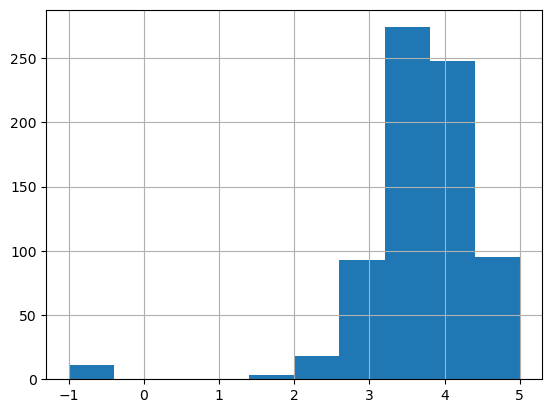

In [59]:
df.Rating.hist()

<AxesSubplot:>

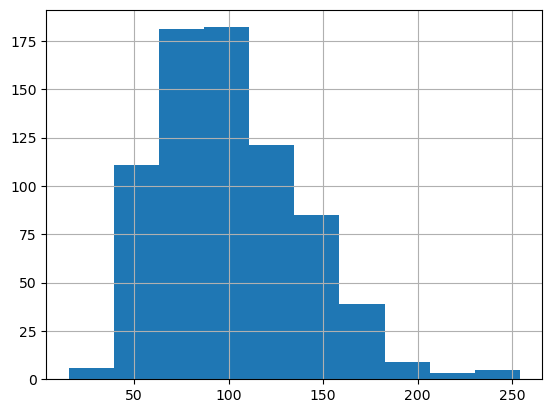

In [60]:
df.avg_salary.hist()

<AxesSubplot:>

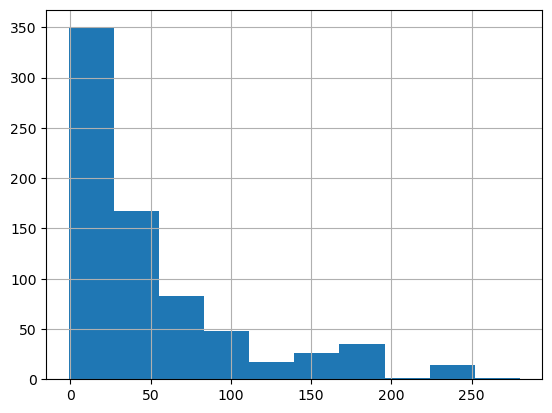

In [61]:
df.company_age.hist()

<AxesSubplot:>

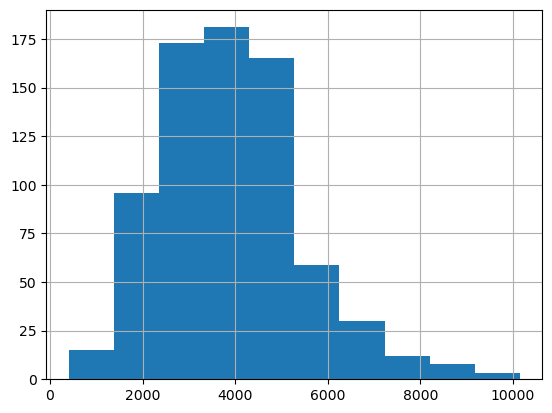

In [62]:
df.jd_length.hist()

<AxesSubplot:>

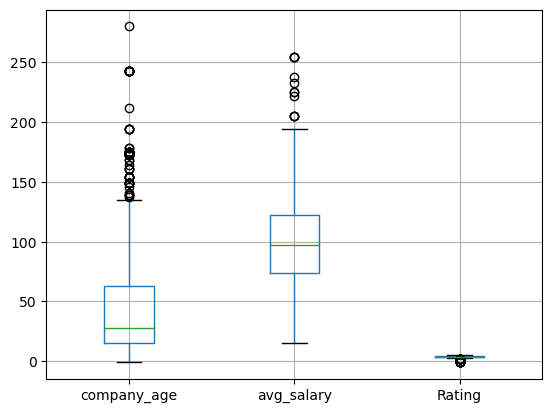

In [63]:
df.boxplot(column = ['company_age','avg_salary','Rating'])

<AxesSubplot:>

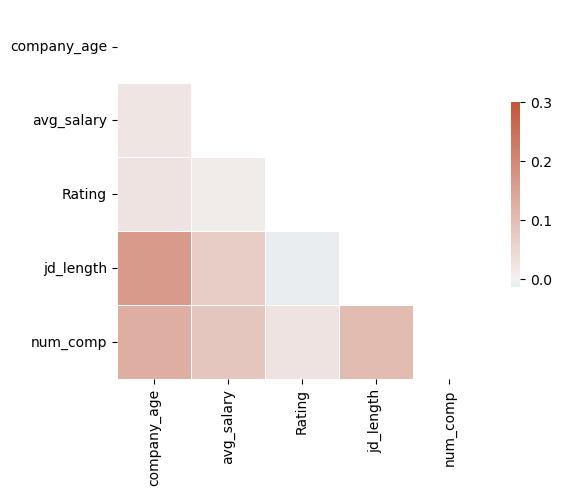

In [64]:
corr = df[['company_age','avg_salary','Rating','jd_length','num_comp']].corr()

import seaborn as sns

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [65]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'job_city', 'same_state_as_hq',
       'company_age', 'python_yn', 'spark_yn', 'cloud_yn', 'deployments_yn',
       'viz_tools_yn', 'api_dev_yn', 'job_title_simplified', 'seniority',
       'jd_length', 'num_comp'],
      dtype='object')

In [66]:
#separating categorical cols to analyze

df_categorical = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_text', 'job_state','python_yn', 'spark_yn', 'cloud_yn', 'deployments_yn',
       'viz_tools_yn', 'api_dev_yn', 'job_title_simplified', 'seniority']]

Chart for Location: total = 200


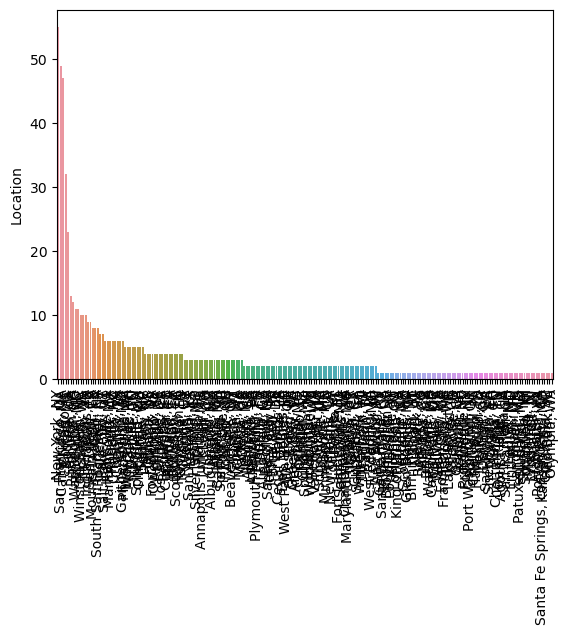

Chart for Headquarters: total = 198


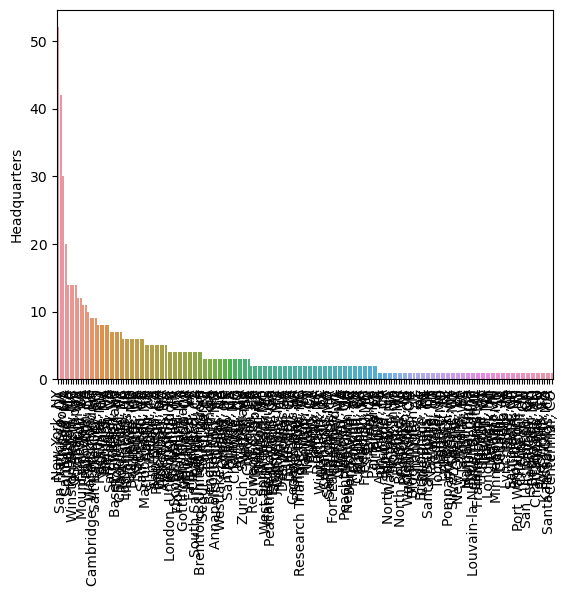

Chart for Size: total = 9


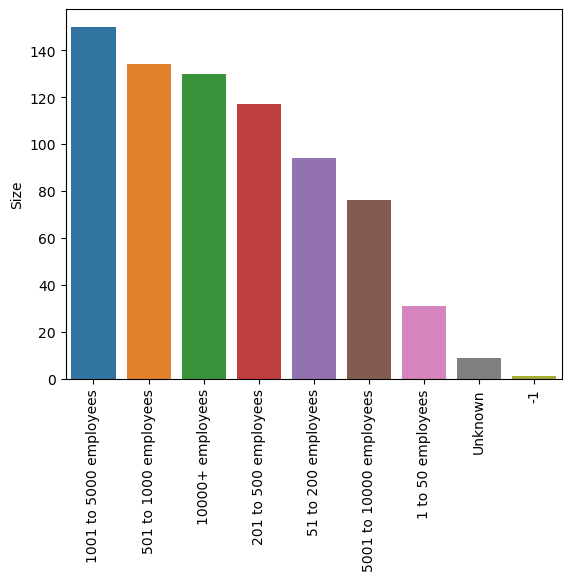

Chart for Type of ownership: total = 11


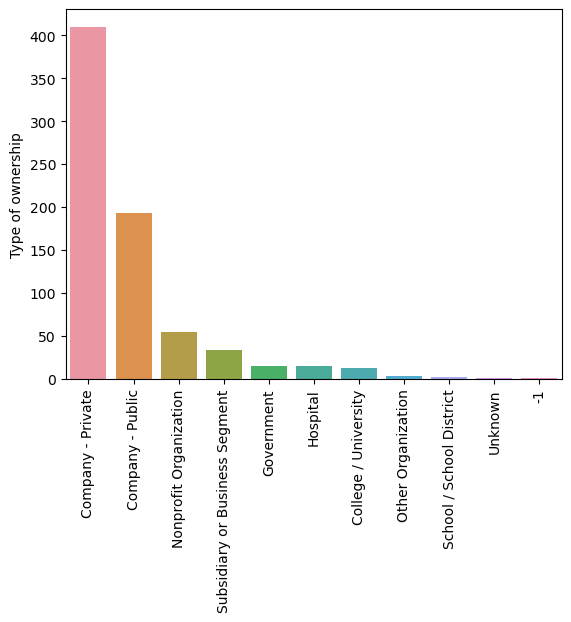

Chart for Industry: total = 60


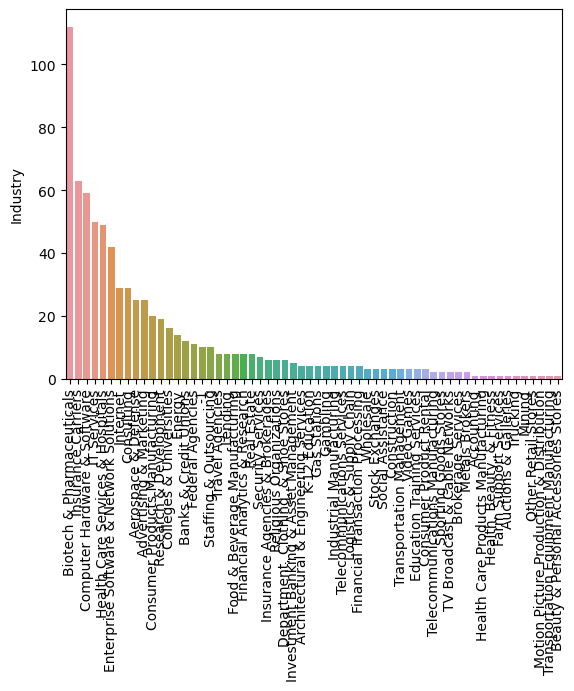

Chart for Sector: total = 25


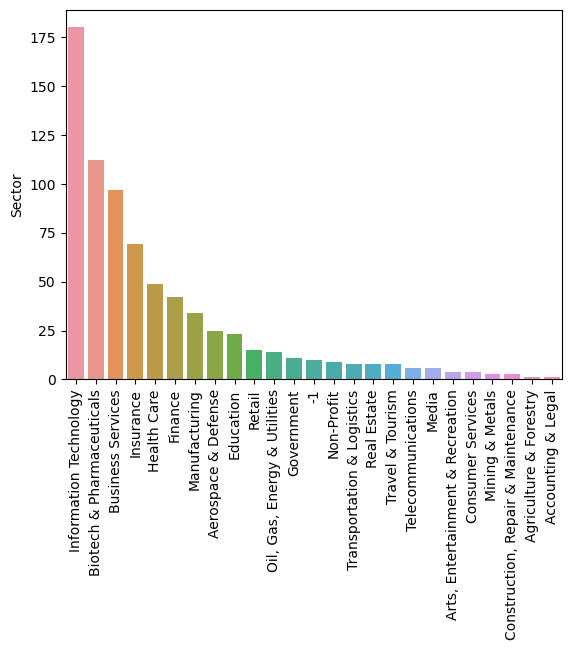

Chart for Revenue: total = 14


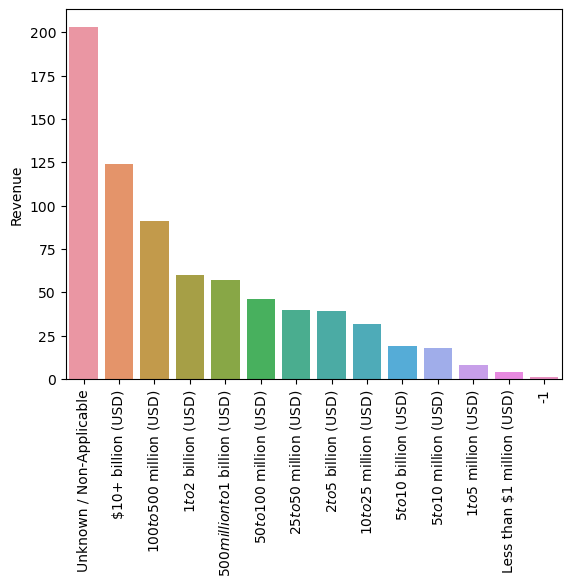

Chart for company_text: total = 343


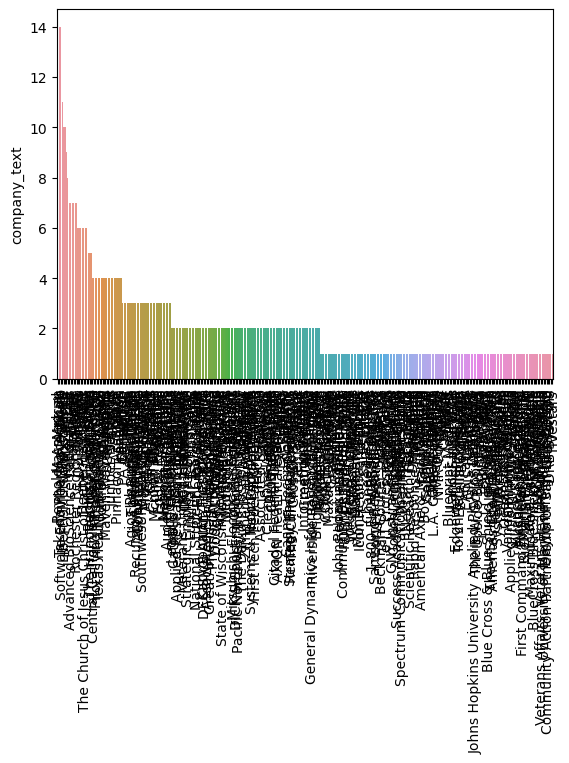

Chart for job_state: total = 37


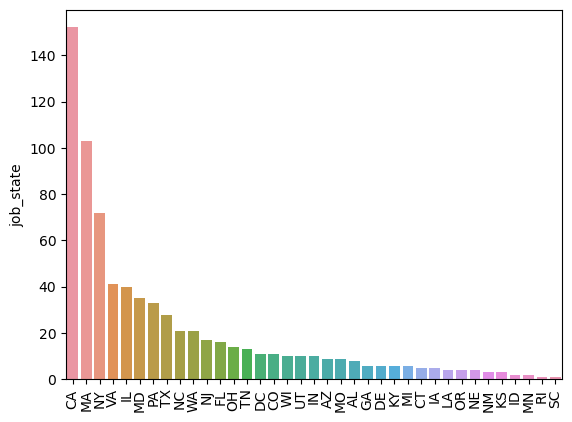

Chart for python_yn: total = 2


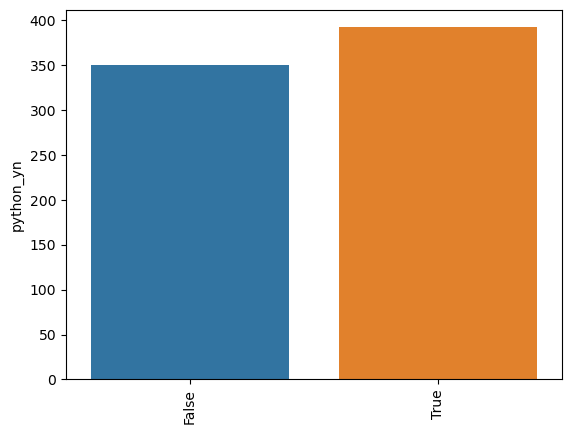

Chart for spark_yn: total = 2


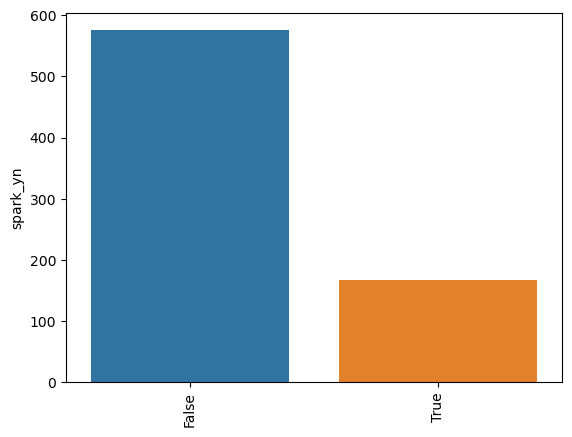

Chart for cloud_yn: total = 2


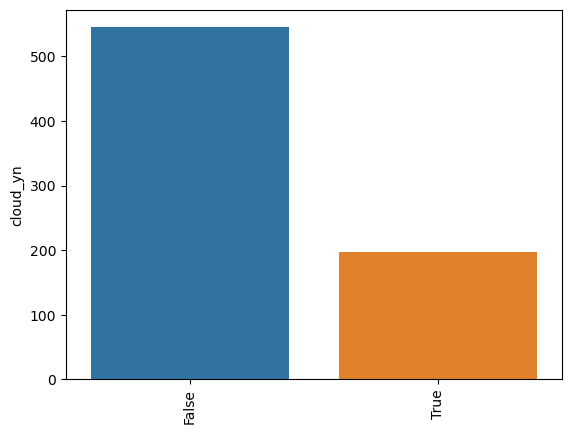

Chart for deployments_yn: total = 2


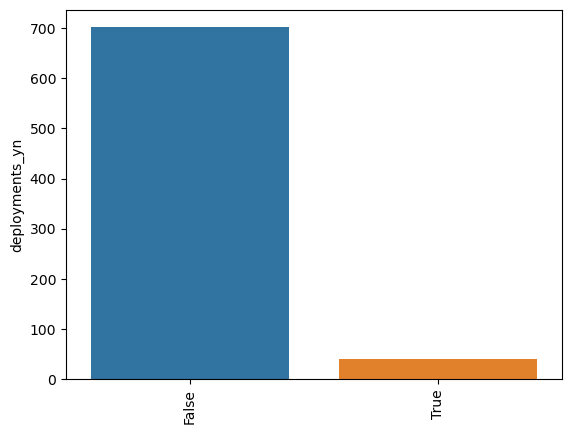

Chart for viz_tools_yn: total = 2


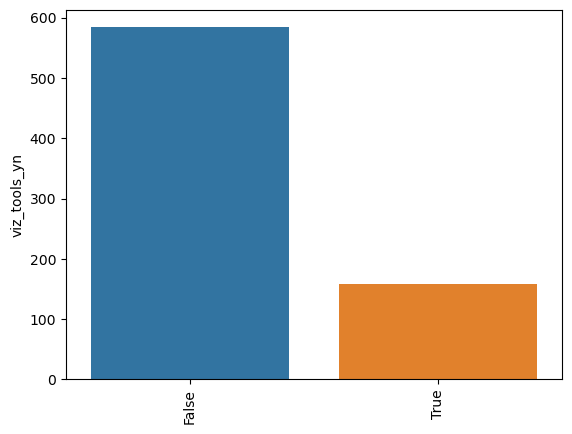

Chart for api_dev_yn: total = 2


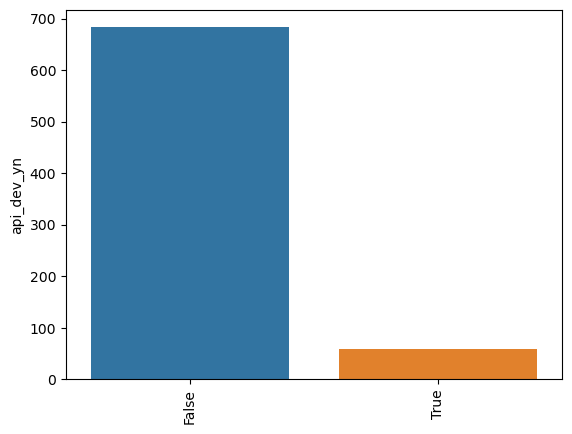

Chart for job_title_simplified: total = 7


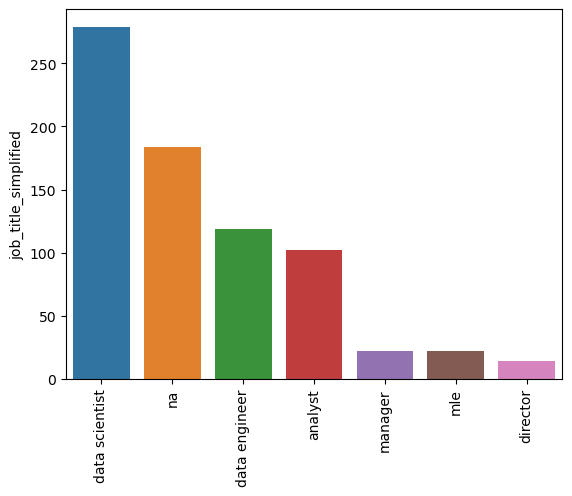

Chart for seniority: total = 3


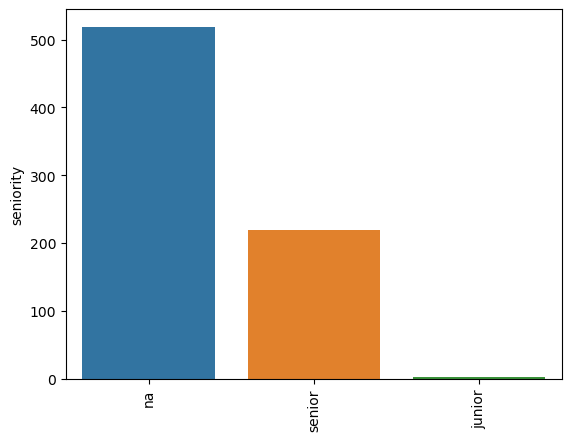

In [34]:
for col in df_categorical.columns:
    category_count = df_categorical[col].value_counts()
    print('Chart for %s: total = %d' % (col, len(category_count)))
    chart = sns.barplot(x = category_count.index,y = category_count)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

Chart for Location: total = 20


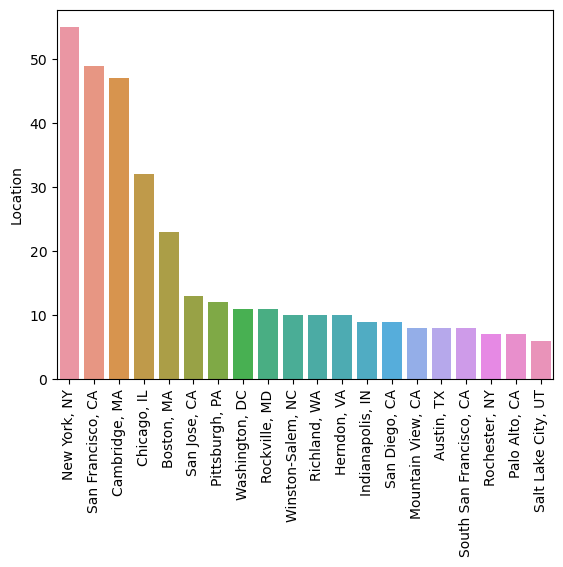

Chart for Headquarters: total = 20


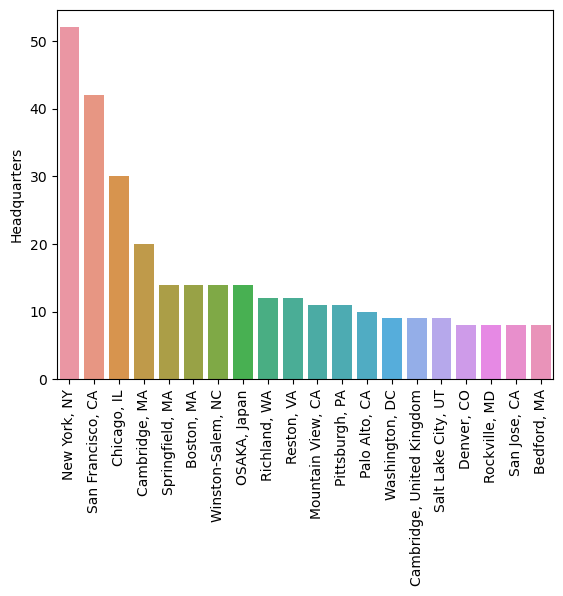

Chart for company_text: total = 20


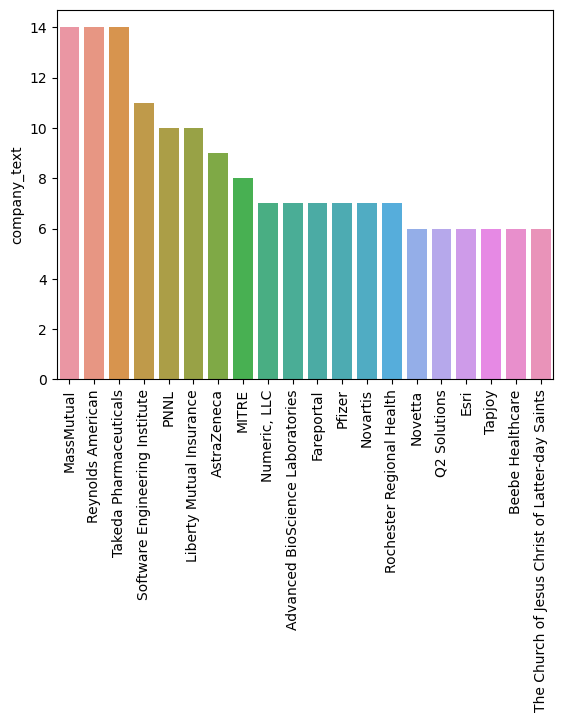

In [35]:
for col in df_categorical[['Location','Headquarters','company_text']].columns:
    category_count = df_categorical[col].value_counts()[:20]
    print('Chart for %s: total = %d' % (col, len(category_count)))
    chart = sns.barplot(x = category_count.index,y = category_count)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

In [71]:
pd.pivot_table(df, index = ['job_title_simplified'], columns=['seniority'], values='avg_salary').sort_values('avg_salary', ascending=False)


KeyError: 'avg_salary'

In [80]:
# Salary x [rating, industry, sector, rev, nom of comps, hourly, emp_provided, skills, jd_length, type of ownership]

df_pivots = df[['Rating','Industry', 'Sector', 'Revenue','num_comp','hourly', 'employer_provided','python_yn', 'spark_yn', 'cloud_yn', 'deployments_yn',
       'viz_tools_yn', 'api_dev_yn','jd_length','Type of ownership','avg_salary','job_title_simplified','seniority']]

In [81]:
for col in df_pivots.columns:
     
     if col != 'avg_salary':
          print(col)
          print(pd.pivot_table(df_pivots, index = col, values = 'avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 4.0    107.170213
 3.2    106.928571
 3.7    105.680328
 3.5    104.897959
 4.7    103.983871
 3.3    103.897436
 4.3    102.468750
 4.2    100.442308
 2.2     97.750000
 3.8     97.418033
 4.6     97.250000
 2.1     95.900000
 3.4     93.465909
 3.6     89.945652
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 2.7     85.178571
 2.8     83.928571
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

In [84]:
pd.pivot_table(df_pivots, index = ['job_title_simplified','seniority'],values='avg_salary').sort_values('avg_salary', ascending=False)

avg_salary
job_title_simplified seniority            
director             na         168.607143
mle                  senior     142.071429
data scientist       senior     138.956522
data engineer        senior     124.689189
mle                  na         119.133333
na                   senior     109.061404
data scientist       na         107.043011
                     junior     106.500000
data engineer        na          96.701220
manager              na          84.022727
analyst              senior      80.092593
na                   na          78.500000
analyst              na          61.308219
                     junior      53.250000

#### Some NLP to parse the Job Description and find most used words

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

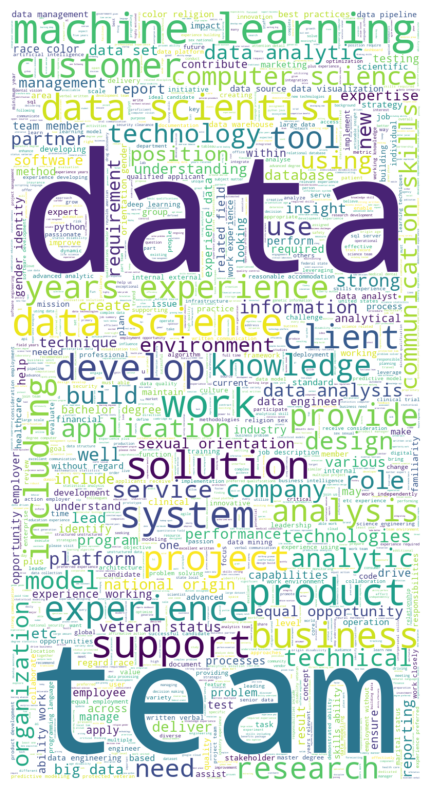

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [37]:
df.to_csv('explored_data_for_model.csv')

In [2]:
#Reading and extracting test data
import pandas as pd
test_df = pd.read_csv('flaskAPI/X_test.csv')

In [39]:
test_df

,Unnamed: 0,Rating,employer_provided,num_comp,hourly,same_state_as_hq,company_age,python_yn,spark_yn,cloud_yn,...,job_title_simplified_analyst,job_title_simplified_data engineer,job_title_simplified_data scientist,job_title_simplified_director,job_title_simplified_manager,job_title_simplified_mle,job_title_simplified_na,seniority_junior,seniority_na,seniority_senior
0,120,4.4,0,0,0,1,25,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,196,3.6,0,0,0,1,38,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,336,3.5,0,3,0,1,14,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,582,3.9,0,0,0,1,12,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,395,4.0,0,2,0,0,17,1,1,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,69,4.0,0,0,0,0,85,0,0,0,...,0,0,0,0,0,0,1,0,1,0
145,223,3.7,0,3,0,0,243,0,0,0,...,0,0,0,0,0,0,1,0,1,0
146,131,3.2,0,3,0,1,66,1,0,0,...,0,0,1,0,0,0,0,0,1,0
147,44,4.3,0,3,0,1,31,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [9]:
test_df.iloc[1,:].values.reshape(1,-1)

array([[1.960e+02, 3.600e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 4.644e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0